# HomeWork 3 Juypter Book

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Deep-Learning

NOTE FOR GRADER : THIS NOTEBOOK REQUIRES MULTIPLE FILES AS OUTLINE IN THE IMPORT LIST, OTHERWISE THIS WILL NOT WORK

# Libary Imports

In [103]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import torch

from hw3Models import *
from hw3DataLoader import getDataLoaders, simpleTextDataLoader
from hw3TrainModel import trainModel, trainModelTQDM
from hw3EvalModel import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 1 

In this homework, we focus on the language model we did in the lectures. However, we expand it to a much longer sequence. Here is the sequence:

“Next character prediction is a fundamental task in the field of natural language processing (NLP) that involves predicting the next character in a sequence of text based on the characters that precede it. This task is essential for various applications, including text auto-completion, spell checking, and even in the development of sophisticated AI models capable of generating human-like text.

At its core, next character prediction relies on statistical models or deep learning algorithms to analyze a given sequence of text and predict which character is most likely to follow. These predictions are based on patterns and relationships learned from large datasets of text during the training phase of the model.

One of the most popular approaches to next character prediction involves the use of Recurrent Neural Networks (RNNs), and more specifically, a variant called Long Short-Term Memory (LSTM) networks. RNNs are particularly well-suited for sequential data like text, as they can maintain information in 'memory' about previous characters to inform the prediction of the next character. LSTM networks enhance this capability by being able to remember long-term dependencies, making them even more effective for next character prediction tasks.

Training a model for next character prediction involves feeding it large amounts of text data, allowing it to learn the probability of each character's appearance following a sequence of characters. During this training process, the model adjusts its parameters to minimize the difference between its predictions and the actual outcomes, thus improving its predictive accuracy over time.

Once trained, the model can be used to predict the next character in a given piece of text by considering the sequence of characters that precede it. This can enhance user experience in text editing software, improve efficiency in coding environments with auto-completion features, and enable more natural interactions with AI-based chatbots and virtual assistants.

In summary, next character prediction plays a crucial role in enhancing the capabilities of various NLP applications, making text-based interactions more efficient, accurate, and human-like. Through the use of advanced machine learning models like RNNs and LSTMs, next character prediction continues to evolve, opening new possibilities for the future of text-based technology.”

Inspired by the course example, train and validate rnn.RNN, rnn.LSTM and rnn.GRU for learning the above sequence. Use sequence lengths of 10, 20, and 30 for your training. Feel free to adjust other network parameters. Report and compare training loss, validation accuracy, execution time for training, and computational and mode size complexities across the three models over various lengths of sequence.

# Problem 1 RNN

In [80]:
trainLoader, testLoader, chars, charToIdx, idxToChar = simpleTextDataLoader(sequenceLength=10, batchSize=128, trainSplit=0.8)

modelCharRNN = CharRNN(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses1, valLosses1, trainAccuracies1, valAccuracies1, epochTimes1, trueLabelsList1, predictedLabelsList1 = trainModel(modelCharRNN,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=100,
                                                                                                                     learningRate=0.0001)


Training on cpu
Epoch 10/100, Train Loss: 2.8490, Train Acc: 24.79%, Val Loss: 2.8920, Val Acc: 21.43%
Epoch 20/100, Train Loss: 2.5448, Train Acc: 30.68%, Val Loss: 2.6391, Val Acc: 27.94%
Epoch 30/100, Train Loss: 2.3567, Train Acc: 36.00%, Val Loss: 2.4883, Val Acc: 32.98%
Epoch 40/100, Train Loss: 2.2180, Train Acc: 38.00%, Val Loss: 2.3816, Val Acc: 33.40%
Epoch 50/100, Train Loss: 2.1029, Train Acc: 42.74%, Val Loss: 2.2981, Val Acc: 39.92%
Epoch 60/100, Train Loss: 2.0022, Train Acc: 45.32%, Val Loss: 2.2298, Val Acc: 42.23%
Epoch 70/100, Train Loss: 1.9107, Train Acc: 47.53%, Val Loss: 2.1721, Val Acc: 44.33%
Epoch 80/100, Train Loss: 1.8259, Train Acc: 48.89%, Val Loss: 2.1243, Val Acc: 46.22%
Epoch 90/100, Train Loss: 1.7509, Train Acc: 51.26%, Val Loss: 2.0839, Val Acc: 46.43%
Epoch 100/100, Train Loss: 1.6767, Train Acc: 53.84%, Val Loss: 2.0508, Val Acc: 47.06%


In [81]:
trainLoader, testLoader, chars, charToIdx, idxToChar = simpleTextDataLoader(sequenceLength=20, batchSize=128, trainSplit=0.8)

modelCharRNN = CharRNN(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses2, valLosses2, trainAccuracies2, valAccuracies2, epochTimes2, trueLabelsList2, predictedLabelsList2 = trainModel(modelCharRNN,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=100,
                                                                                                                     learningRate=0.00015)

Training on cpu
Epoch 10/100, Train Loss: 2.6598, Train Acc: 29.92%, Val Loss: 2.8037, Val Acc: 25.53%
Epoch 20/100, Train Loss: 2.3455, Train Acc: 36.47%, Val Loss: 2.5633, Val Acc: 32.49%
Epoch 30/100, Train Loss: 2.1491, Train Acc: 41.17%, Val Loss: 2.4169, Val Acc: 36.29%
Epoch 40/100, Train Loss: 1.9925, Train Acc: 45.56%, Val Loss: 2.3168, Val Acc: 39.45%
Epoch 50/100, Train Loss: 1.8623, Train Acc: 48.31%, Val Loss: 2.2474, Val Acc: 40.93%
Epoch 60/100, Train Loss: 1.7453, Train Acc: 51.22%, Val Loss: 2.1978, Val Acc: 41.14%
Epoch 70/100, Train Loss: 1.6440, Train Acc: 53.59%, Val Loss: 2.1575, Val Acc: 42.41%
Epoch 80/100, Train Loss: 1.5522, Train Acc: 56.29%, Val Loss: 2.1270, Val Acc: 43.04%
Epoch 90/100, Train Loss: 1.4674, Train Acc: 59.09%, Val Loss: 2.1033, Val Acc: 44.73%
Epoch 100/100, Train Loss: 1.3898, Train Acc: 61.52%, Val Loss: 2.0867, Val Acc: 45.36%


In [82]:
trainLoader, testLoader, chars, charToIdx, idxToChar = simpleTextDataLoader(sequenceLength=30, batchSize=128, trainSplit=0.8)

modelCharRNN = CharRNN(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses3, valLosses3, trainAccuracies3, valAccuracies3, epochTimes3, trueLabelsList3, predictedLabelsList3 = trainModel(modelCharRNN,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=100,
                                                                                                                     learningRate=0.0001)

Training on cpu
Epoch 10/100, Train Loss: 2.8918, Train Acc: 22.13%, Val Loss: 2.8689, Val Acc: 22.25%
Epoch 20/100, Train Loss: 2.5538, Train Acc: 32.43%, Val Loss: 2.5949, Val Acc: 30.72%
Epoch 30/100, Train Loss: 2.3481, Train Acc: 37.58%, Val Loss: 2.4607, Val Acc: 34.32%
Epoch 40/100, Train Loss: 2.1971, Train Acc: 40.92%, Val Loss: 2.3758, Val Acc: 35.81%
Epoch 50/100, Train Loss: 2.0734, Train Acc: 44.48%, Val Loss: 2.3141, Val Acc: 38.35%
Epoch 60/100, Train Loss: 1.9666, Train Acc: 46.07%, Val Loss: 2.2645, Val Acc: 38.56%
Epoch 70/100, Train Loss: 1.8746, Train Acc: 48.41%, Val Loss: 2.2259, Val Acc: 40.04%
Epoch 80/100, Train Loss: 1.7934, Train Acc: 50.11%, Val Loss: 2.1940, Val Acc: 40.89%
Epoch 90/100, Train Loss: 1.7205, Train Acc: 51.27%, Val Loss: 2.1671, Val Acc: 40.89%
Epoch 100/100, Train Loss: 1.6517, Train Acc: 53.98%, Val Loss: 2.1459, Val Acc: 41.31%


charRNN - sequenceLength=10 Final Training Accuracy: 53.84%
charRNN - sequenceLength=10 Final Validation Accuracy: 47.06%
charRNN - sequenceLength=10 Total Training Time: 8.07 seconds

charRNN - sequenceLength=20 Final Training Accuracy: 61.52%
charRNN - sequenceLength=20 Final Validation Accuracy: 45.36%
charRNN - sequenceLength=20 Total Training Time: 12.79 seconds

charRNN - sequenceLength=30 Final Training Accuracy: 53.98%
charRNN - sequenceLength=30 Final Validation Accuracy: 41.31%
charRNN - sequenceLength=30 Total Training Time: 17.81 seconds



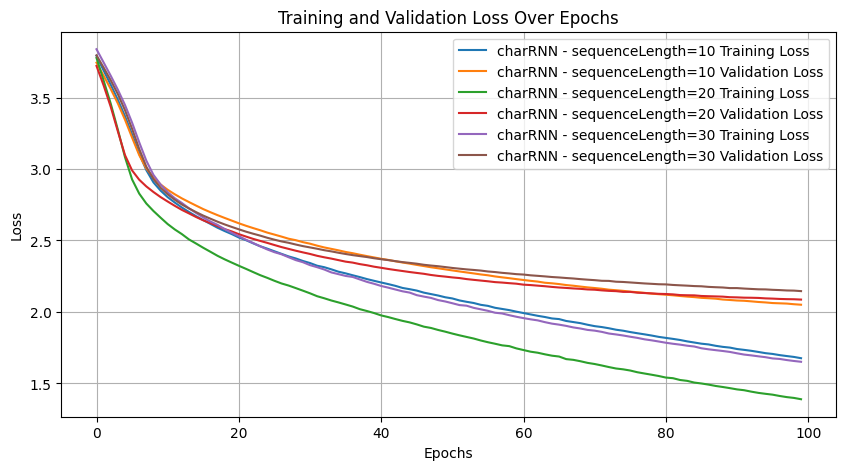

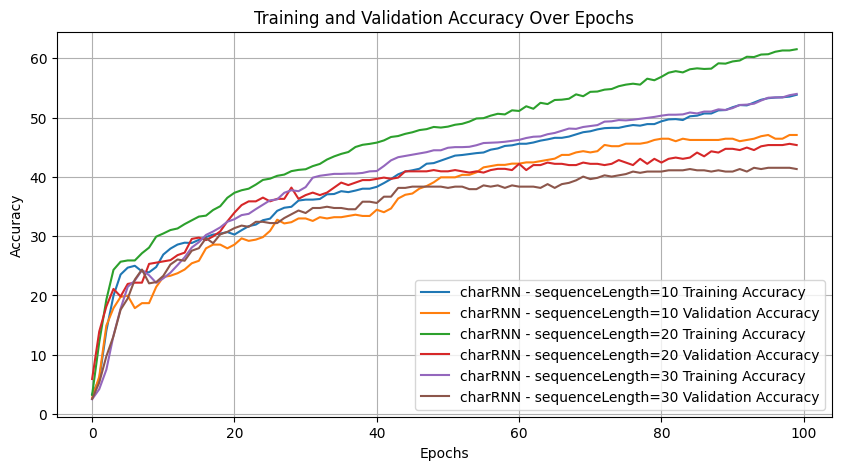

In [83]:
trainAccuracies = [trainAccuracies1, trainAccuracies2, trainAccuracies3]
valAccuracies = [valAccuracies1, valAccuracies2, valAccuracies3]

trainLosses = [trainLosses1, trainLosses2, trainLosses3]
valLosses = [valLosses1, valLosses2, valLosses3]

epochTimesMulti = [epochTimes1, epochTimes2, epochTimes3]

modelNames = ['charRNN - sequenceLength=10', 'charRNN - sequenceLength=20', 'charRNN - sequenceLength=30']


reportMultiFinalMetrics(trainAccuracies, valAccuracies, epochTimesMulti, modelNames)
plotMultiLoss(trainLosses, valLosses, modelNames)
plotMultAccuracy(trainAccuracies, valAccuracies, modelNames)

# Problem 1 LSTM

In [84]:
trainLoader, testLoader, chars, charToIdx, idxToChar = simpleTextDataLoader(sequenceLength=10, batchSize=128, trainSplit=0.8)

modelCharLSTM = CharLSTM(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses1, valLosses1, trainAccuracies1, valAccuracies1, epochTimes1, trueLabelsList1, predictedLabelsList1 = trainModel(modelCharLSTM,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=100,
                                                                                                                     learningRate=0.0001)

Training on cpu
Epoch 10/100, Train Loss: 2.9200, Train Acc: 17.89%, Val Loss: 2.9566, Val Acc: 16.60%
Epoch 20/100, Train Loss: 2.6404, Train Acc: 28.68%, Val Loss: 2.7263, Val Acc: 25.21%
Epoch 30/100, Train Loss: 2.4469, Train Acc: 35.42%, Val Loss: 2.5796, Val Acc: 31.72%
Epoch 40/100, Train Loss: 2.2931, Train Acc: 39.16%, Val Loss: 2.4712, Val Acc: 34.66%
Epoch 50/100, Train Loss: 2.1699, Train Acc: 42.26%, Val Loss: 2.3840, Val Acc: 36.34%
Epoch 60/100, Train Loss: 2.0631, Train Acc: 45.05%, Val Loss: 2.3137, Val Acc: 39.71%
Epoch 70/100, Train Loss: 1.9664, Train Acc: 48.32%, Val Loss: 2.2543, Val Acc: 41.39%
Epoch 80/100, Train Loss: 1.8750, Train Acc: 50.53%, Val Loss: 2.2033, Val Acc: 42.23%
Epoch 90/100, Train Loss: 1.7916, Train Acc: 52.42%, Val Loss: 2.1600, Val Acc: 43.91%
Epoch 100/100, Train Loss: 1.7081, Train Acc: 54.11%, Val Loss: 2.1256, Val Acc: 44.12%


In [85]:
trainLoader, testLoader, chars, charToIdx, idxToChar = simpleTextDataLoader(sequenceLength=20, batchSize=128, trainSplit=0.8)

modelCharLSTM = CharLSTM(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses2, valLosses2, trainAccuracies2, valAccuracies2, epochTimes2, trueLabelsList2, predictedLabelsList2 = trainModel(modelCharLSTM,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=100,
                                                                                                                     learningRate=0.0001)

Training on cpu
Epoch 10/100, Train Loss: 2.9034, Train Acc: 20.24%, Val Loss: 2.9813, Val Acc: 18.99%
Epoch 20/100, Train Loss: 2.6437, Train Acc: 27.06%, Val Loss: 2.7871, Val Acc: 24.89%
Epoch 30/100, Train Loss: 2.4604, Train Acc: 32.03%, Val Loss: 2.6521, Val Acc: 29.75%
Epoch 40/100, Train Loss: 2.3217, Train Acc: 36.05%, Val Loss: 2.5509, Val Acc: 32.70%
Epoch 50/100, Train Loss: 2.2034, Train Acc: 39.80%, Val Loss: 2.4710, Val Acc: 35.02%
Epoch 60/100, Train Loss: 2.0959, Train Acc: 42.86%, Val Loss: 2.4066, Val Acc: 38.19%
Epoch 70/100, Train Loss: 1.9975, Train Acc: 44.50%, Val Loss: 2.3548, Val Acc: 39.03%
Epoch 80/100, Train Loss: 1.9086, Train Acc: 48.04%, Val Loss: 2.3144, Val Acc: 39.87%
Epoch 90/100, Train Loss: 1.8213, Train Acc: 49.89%, Val Loss: 2.2875, Val Acc: 40.72%
Epoch 100/100, Train Loss: 1.7400, Train Acc: 52.43%, Val Loss: 2.2630, Val Acc: 40.72%


In [86]:
trainLoader, testLoader, chars, charToIdx, idxToChar = simpleTextDataLoader(sequenceLength=30, batchSize=128, trainSplit=0.8)

modelCharLSTM = CharLSTM(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses3, valLosses3, trainAccuracies3, valAccuracies3, epochTimes3, trueLabelsList3, predictedLabelsList3 = trainModel(modelCharLSTM,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=100,
                                                                                                                     learningRate=0.0001)

Training on cpu
Epoch 10/100, Train Loss: 2.9246, Train Acc: 20.28%, Val Loss: 2.8672, Val Acc: 21.19%
Epoch 20/100, Train Loss: 2.6686, Train Acc: 27.65%, Val Loss: 2.6722, Val Acc: 27.75%
Epoch 30/100, Train Loss: 2.4790, Train Acc: 31.10%, Val Loss: 2.5409, Val Acc: 30.30%
Epoch 40/100, Train Loss: 2.3267, Train Acc: 37.10%, Val Loss: 2.4497, Val Acc: 33.69%
Epoch 50/100, Train Loss: 2.1954, Train Acc: 41.30%, Val Loss: 2.3803, Val Acc: 37.08%
Epoch 60/100, Train Loss: 2.0843, Train Acc: 43.68%, Val Loss: 2.3220, Val Acc: 39.41%
Epoch 70/100, Train Loss: 1.9810, Train Acc: 46.34%, Val Loss: 2.2783, Val Acc: 39.62%
Epoch 80/100, Train Loss: 1.8877, Train Acc: 48.20%, Val Loss: 2.2417, Val Acc: 40.04%
Epoch 90/100, Train Loss: 1.7972, Train Acc: 50.58%, Val Loss: 2.2121, Val Acc: 40.68%
Epoch 100/100, Train Loss: 1.7220, Train Acc: 53.08%, Val Loss: 2.1892, Val Acc: 39.83%


charLSTM - sequenceLength=10 Final Training Accuracy: 54.11%
charLSTM - sequenceLength=10 Final Validation Accuracy: 44.12%
charLSTM - sequenceLength=10 Total Training Time: 13.37 seconds

charLSTM - sequenceLength=20 Final Training Accuracy: 52.43%
charLSTM - sequenceLength=20 Final Validation Accuracy: 40.72%
charLSTM - sequenceLength=20 Total Training Time: 20.68 seconds

charLSTM - sequenceLength=30 Final Training Accuracy: 53.08%
charLSTM - sequenceLength=30 Final Validation Accuracy: 39.83%
charLSTM - sequenceLength=30 Total Training Time: 27.60 seconds



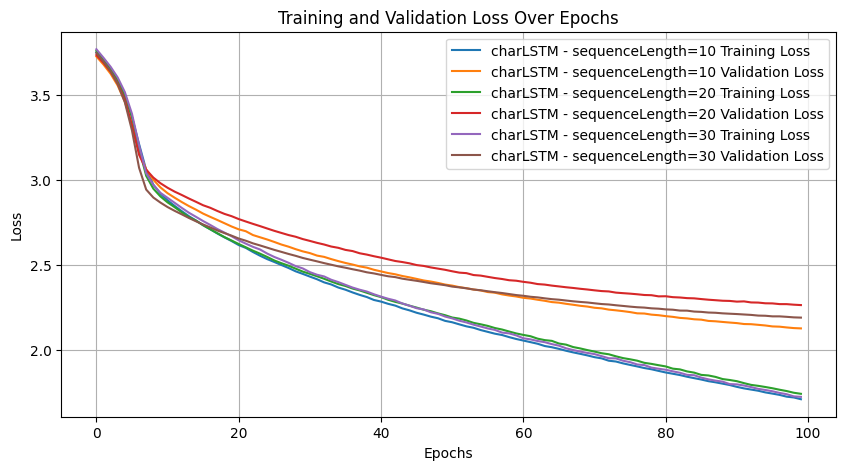

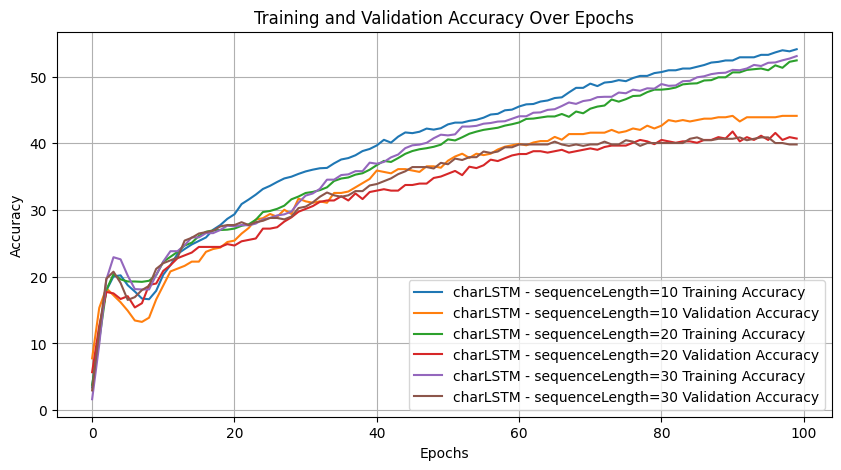

In [87]:
trainAccuracies = [trainAccuracies1, trainAccuracies2, trainAccuracies3]
valAccuracies = [valAccuracies1, valAccuracies2, valAccuracies3]

trainLosses = [trainLosses1, trainLosses2, trainLosses3]
valLosses = [valLosses1, valLosses2, valLosses3]

epochTimesMulti = [epochTimes1, epochTimes2, epochTimes3]

modelNames = ['charLSTM - sequenceLength=10', 'charLSTM - sequenceLength=20', 'charLSTM - sequenceLength=30']


reportMultiFinalMetrics(trainAccuracies, valAccuracies, epochTimesMulti, modelNames)
plotMultiLoss(trainLosses, valLosses, modelNames)
plotMultAccuracy(trainAccuracies, valAccuracies, modelNames)

# Problem 1 GRU

In [88]:
trainLoader, testLoader, chars, charToIdx, idxToChar = simpleTextDataLoader(sequenceLength=10, batchSize=128, trainSplit=0.8)

modelCharGRU = CharGRU(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses1, valLosses1, trainAccuracies1, valAccuracies1, epochTimes1, trueLabelsList1, predictedLabelsList1 = trainModel(modelCharGRU,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=100,
                                                                                                                     learningRate=0.0001)

Training on cpu
Epoch 10/100, Train Loss: 2.8949, Train Acc: 21.16%, Val Loss: 2.9542, Val Acc: 19.33%
Epoch 20/100, Train Loss: 2.6082, Train Acc: 29.00%, Val Loss: 2.7061, Val Acc: 25.42%
Epoch 30/100, Train Loss: 2.4097, Train Acc: 33.05%, Val Loss: 2.5447, Val Acc: 28.36%
Epoch 40/100, Train Loss: 2.2541, Train Acc: 38.00%, Val Loss: 2.4292, Val Acc: 34.03%
Epoch 50/100, Train Loss: 2.1319, Train Acc: 40.79%, Val Loss: 2.3368, Val Acc: 38.45%
Epoch 60/100, Train Loss: 2.0214, Train Acc: 44.42%, Val Loss: 2.2602, Val Acc: 42.86%
Epoch 70/100, Train Loss: 1.9192, Train Acc: 47.32%, Val Loss: 2.1916, Val Acc: 43.28%
Epoch 80/100, Train Loss: 1.8302, Train Acc: 50.11%, Val Loss: 2.1363, Val Acc: 44.54%
Epoch 90/100, Train Loss: 1.7451, Train Acc: 51.74%, Val Loss: 2.0888, Val Acc: 44.96%
Epoch 100/100, Train Loss: 1.6654, Train Acc: 55.26%, Val Loss: 2.0480, Val Acc: 46.01%


In [89]:
trainLoader, testLoader, chars, charToIdx, idxToChar = simpleTextDataLoader(sequenceLength=20, batchSize=128, trainSplit=0.8)

modelCharGRU = CharGRU(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses2, valLosses2, trainAccuracies2, valAccuracies2, epochTimes2, trueLabelsList2, predictedLabelsList2 = trainModel(modelCharGRU,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=100,
                                                                                                                     learningRate=0.0001)

Training on cpu
Epoch 10/100, Train Loss: 2.8762, Train Acc: 19.82%, Val Loss: 2.9536, Val Acc: 20.04%
Epoch 20/100, Train Loss: 2.5859, Train Acc: 30.34%, Val Loss: 2.7417, Val Acc: 27.64%
Epoch 30/100, Train Loss: 2.3800, Train Acc: 33.67%, Val Loss: 2.5884, Val Acc: 30.80%
Epoch 40/100, Train Loss: 2.2282, Train Acc: 38.79%, Val Loss: 2.4734, Val Acc: 34.60%
Epoch 50/100, Train Loss: 2.1060, Train Acc: 43.29%, Val Loss: 2.3831, Val Acc: 38.82%
Epoch 60/100, Train Loss: 1.9985, Train Acc: 45.03%, Val Loss: 2.3133, Val Acc: 39.45%
Epoch 70/100, Train Loss: 1.9006, Train Acc: 48.04%, Val Loss: 2.2577, Val Acc: 41.77%
Epoch 80/100, Train Loss: 1.8091, Train Acc: 50.16%, Val Loss: 2.2130, Val Acc: 42.19%
Epoch 90/100, Train Loss: 1.7293, Train Acc: 52.27%, Val Loss: 2.1761, Val Acc: 43.04%
Epoch 100/100, Train Loss: 1.6528, Train Acc: 54.70%, Val Loss: 2.1435, Val Acc: 43.67%


In [90]:
trainLoader, testLoader, chars, charToIdx, idxToChar = simpleTextDataLoader(sequenceLength=30, batchSize=128, trainSplit=0.8)

modelCharGRU = CharGRU(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses3, valLosses3, trainAccuracies3, valAccuracies3, epochTimes3, trueLabelsList3, predictedLabelsList3 = trainModel(modelCharGRU,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=100,
                                                                                                                     learningRate=0.0001)

Training on cpu
Epoch 10/100, Train Loss: 2.9208, Train Acc: 19.90%, Val Loss: 2.8768, Val Acc: 22.46%
Epoch 20/100, Train Loss: 2.6378, Train Acc: 29.72%, Val Loss: 2.6580, Val Acc: 28.60%
Epoch 30/100, Train Loss: 2.4229, Train Acc: 32.70%, Val Loss: 2.5075, Val Acc: 30.51%
Epoch 40/100, Train Loss: 2.2623, Train Acc: 39.23%, Val Loss: 2.4012, Val Acc: 35.59%
Epoch 50/100, Train Loss: 2.1266, Train Acc: 42.09%, Val Loss: 2.3226, Val Acc: 38.35%
Epoch 60/100, Train Loss: 2.0136, Train Acc: 45.12%, Val Loss: 2.2576, Val Acc: 40.25%
Epoch 70/100, Train Loss: 1.9119, Train Acc: 46.92%, Val Loss: 2.2012, Val Acc: 39.62%
Epoch 80/100, Train Loss: 1.8211, Train Acc: 49.36%, Val Loss: 2.1534, Val Acc: 40.68%
Epoch 90/100, Train Loss: 1.7391, Train Acc: 51.27%, Val Loss: 2.1117, Val Acc: 41.53%
Epoch 100/100, Train Loss: 1.6602, Train Acc: 53.40%, Val Loss: 2.0751, Val Acc: 41.31%


charGRU - sequenceLength=10 Final Training Accuracy: 55.26%
charGRU - sequenceLength=10 Final Validation Accuracy: 46.01%
charGRU - sequenceLength=10 Total Training Time: 15.64 seconds

charGRU - sequenceLength=20 Final Training Accuracy: 54.70%
charGRU - sequenceLength=20 Final Validation Accuracy: 43.67%
charGRU - sequenceLength=20 Total Training Time: 27.49 seconds

charGRU - sequenceLength=30 Final Training Accuracy: 53.40%
charGRU - sequenceLength=30 Final Validation Accuracy: 41.31%
charGRU - sequenceLength=30 Total Training Time: 38.99 seconds



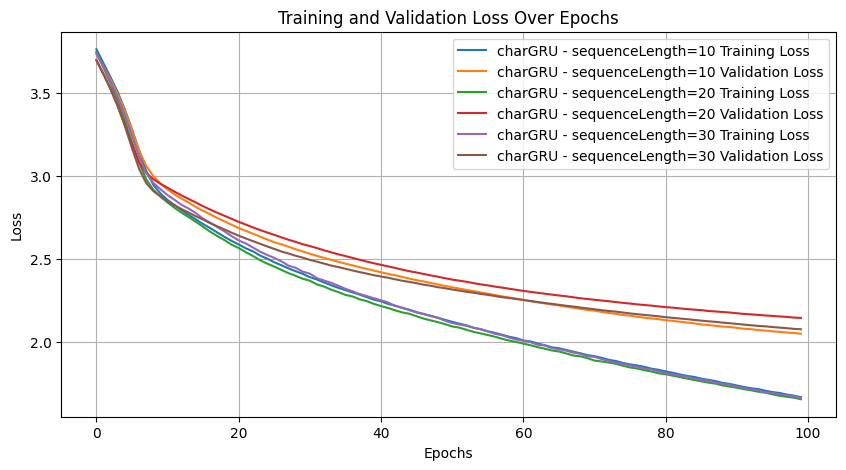

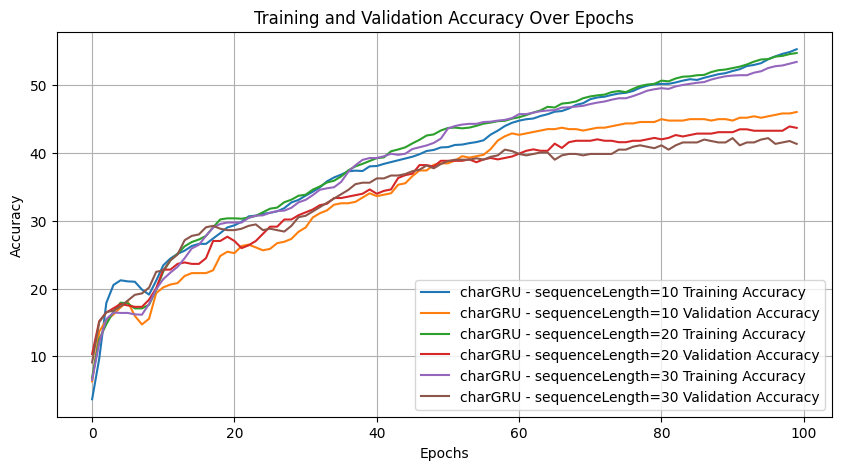

In [91]:
trainAccuracies = [trainAccuracies1, trainAccuracies2, trainAccuracies3]
valAccuracies = [valAccuracies1, valAccuracies2, valAccuracies3]

trainLosses = [trainLosses1, trainLosses2, trainLosses3]
valLosses = [valLosses1, valLosses2, valLosses3]

epochTimesMulti = [epochTimes1, epochTimes2, epochTimes3]

modelNames = ['charGRU - sequenceLength=10', 'charGRU - sequenceLength=20', 'charGRU - sequenceLength=30']


reportMultiFinalMetrics(trainAccuracies, valAccuracies, epochTimesMulti, modelNames)
plotMultiLoss(trainLosses, valLosses, modelNames)
plotMultAccuracy(trainAccuracies, valAccuracies, modelNames)

# Problem 2

Build the model for.LSTM and rnn.GRU for the tiny Shakespeare dataset, the data loader code is already provided.

Train the models for the sequence of 20 and 30, report and compare training loss, validation accuracy, execution time for training, and computational and mode size complexities across the two models.

Adjust the hyperparameters (fully connected network, number of hidden layers, and the number of hidden states) and compare your results (training and validation loss, computation complexity, model size, training and inference time, and the output sequence). Analyze their influence on accuracy, running time, and computational perplexity.

What if we increase the sequence length to 50. Perform the training and report the accuracy and model complexity results.

In [92]:
url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"

# Problem 2 LSTM

In [ ]:
trainLoader, testLoader, chars, charToIdx, idxToChar = getDataLoaders(url, sequenceLength=20, batchSize=128, trainSplit=0.8)

modelCharLSTM = CharLSTM(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses1, valLosses1, trainAccuracies1, valAccuracies1, epochTimes1, trueLabelsList1, predictedLabelsList1 = trainModelTQDM(modelCharLSTM,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=10,
                                                                                                                     learningRate=0.005)

Training on cpu


Epoch 3/10:  30%|███       | 3/10 [05:03<11:50, 101.54s/it, time=102.17s, train_acc=52.73%, train_loss=1.5592, val_acc=52.82%, val_loss=1.5675]

In [ ]:
trainLoader, testLoader, chars, charToIdx, idxToChar = getDataLoaders(url, sequenceLength=30, batchSize=128, trainSplit=0.8)

modelCharLSTM = CharLSTM(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses2, valLosses2, trainAccuracies2, valAccuracies2, epochTimes2, trueLabelsList2, predictedLabelsList2 = trainModelTQDM(modelCharLSTM,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=100,
                                                                                                                     learningRate=0.005)

In [ ]:
trainLoader, testLoader, chars, charToIdx, idxToChar = getDataLoaders(url, sequenceLength=50, batchSize=128, trainSplit=0.8)

modelCharLSTM = CharLSTM(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses3, valLosses3, trainAccuracies3, valAccuracies3, epochTimes3, trueLabelsList3, predictedLabelsList3 = trainModelTQDM(modelCharLSTM,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=100,
                                                                                                                     learningRate=0.005)

In [ ]:
trainAccuracies = [trainAccuracies1, trainAccuracies2, trainAccuracies3]
valAccuracies = [valAccuracies1, valAccuracies2, valAccuracies3]

trainLosses = [trainLosses1, trainLosses2, trainLosses3]
valLosses = [valLosses1, valLosses2, valLosses3]

epochTimesMulti = [epochTimes1, epochTimes2, epochTimes3]

modelNames = ['charLSTM - sequenceLength=10', 'charLSTM - sequenceLength=20', 'charLSTM - sequenceLength=30']


reportMultiFinalMetrics(trainAccuracies, valAccuracies, epochTimesMulti, modelNames)
plotMultiLoss(trainLosses, valLosses, modelNames)
plotMultAccuracy(trainAccuracies, valAccuracies, modelNames)

# Problem 2 LSTM Adjusted

In [ ]:
trainLoader, testLoader, chars, charToIdx, idxToChar = getDataLoaders(url, sequenceLength=50, batchSize=128, trainSplit=0.8)

modelCharLSTM = CharLSTM(input_size=len(chars),hidden_size=256,output_size=len(chars))

trainLosses, valLosses, trainAccuracies, valAccuracies, epochTimes, trueLabelsList, predictedLabelsList = trainModelTQDM(modelCharLSTM,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=100,
                                                                                                                     learningRate=0.005)

In [ ]:
reportFinalMetrics(trainAccuracies, valAccuracies, epochTimes)
plotLoss(trainLosses, valLosses)
plotAccuracy(trainAccuracies, valAccuracies)

# Problem 2 GRU

In [ ]:
trainLoader, testLoader, chars, charToIdx, idxToChar = getDataLoaders(url, sequenceLength=20, batchSize=128, trainSplit=0.8)

modelCharGRU = CharGRU(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses1, valLosses1, trainAccuracies1, valAccuracies1, epochTimes1, trueLabelsList1, predictedLabelsList1 = trainModelTQDM(modelCharGRU,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=10,
                                                                                                                     learningRate=0.005)

In [ ]:
trainLoader, testLoader, chars, charToIdx, idxToChar = getDataLoaders(url, sequenceLength=30, batchSize=128, trainSplit=0.8)

modelCharGRU = CharGRU(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses2, valLosses2, trainAccuracies2, valAccuracies2, epochTimes2, trueLabelsList2, predictedLabelsList2 = trainModelTQDM(modelCharGRU,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=10,
                                                                                                                     learningRate=0.005)

Training on cpu


KeyboardInterrupt: 

In [ ]:
trainLoader, testLoader, chars, charToIdx, idxToChar = getDataLoaders(url, sequenceLength=50, batchSize=128, trainSplit=0.8)

modelCharGRU = CharGRU(input_size=len(chars),hidden_size=128,output_size=len(chars))

trainLosses3, valLosses3, trainAccuracies3, valAccuracies3, epochTimes3, trueLabelsList3, predictedLabelsList3 = trainModelTQDM(modelCharGRU,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=10,
                                                                                                                     learningRate=0.005)

In [ ]:
trainAccuracies = [trainAccuracies1, trainAccuracies2, trainAccuracies3]
valAccuracies = [valAccuracies1, valAccuracies2, valAccuracies3]

trainLosses = [trainLosses1, trainLosses2, trainLosses3]
valLosses = [valLosses1, valLosses2, valLosses3]

epochTimesMulti = [epochTimes1, epochTimes2, epochTimes3]

modelNames = ['charLSTM - sequenceLength=10', 'charLSTM - sequenceLength=20', 'charLSTM - sequenceLength=30']


reportMultiFinalMetrics(trainAccuracies, valAccuracies, epochTimesMulti, modelNames)
plotMultiLoss(trainLosses, valLosses, modelNames)
plotMultAccuracy(trainAccuracies, valAccuracies, modelNames)

# Problem 2 GRU Adjusted

In [ ]:
trainLoader, testLoader, chars, charToIdx, idxToChar = getDataLoaders(url, sequenceLength=50, batchSize=256, trainSplit=0.8)

modelCharGRU = CharGRU(input_size=len(chars),hidden_size=256,output_size=len(chars))

trainLosses, valLosses, trainAccuracies, valAccuracies, epochTimes, trueLabelsList, predictedLabelsList = trainModelTQDM(modelCharGRU,
                                                                                                                     trainLoader,
                                                                                                                     testLoader,
                                                                                                                     numEpochs=10,
                                                                                                                     learningRate=0.0015)